# Unit 06 More Statistics: Comparing Distributions

<a rel="license" href="https://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons Licence" style="border-width:0" src="https://licensebuttons.net/l/by/4.0/88x31.png" title='This work is licensed under a Creative Commons Attribution 4.0 International License.' align="right"/></a>

Author: Dr Antonia Mey   
Email: antonia.mey@ed.ac.uk

### Learning Objectives

* Be confident in computing statistical properties of a dataset
* Know how to plot a histogram and box-plot
* Use the Student's t-test in Python to compare datasets
* Recap of how to read data
* Recap of how to plot basic data

### Table of Contents
1. [Summary of how to Read Data Files](#reading)    
    1.1 [Inspecting files](#head)    
    1.2 [Reading Files with NumPy](#numpy)    
    1.3 [Reading Files with Pandas](#pandas)    
    1.4 [Basic Reading with Python](#basic)    
    1.5 [Tasks](#tasks_1)    
2. [Plotting Recap](#understanding)    
3. [Handling Datasets and Statistics](#dataset)    
   3.1 [Working with Measurement Data](#data)    
   3.2 [Tasks](#tasks2)
4. [Comparing two Distributions](#stats)    
   4.1 [The Gauss Distribution](#Gauss)    
   4.2 [Box Plots](#box-plot)    
   4.3 [Student's t-test](#test)    
   4.4 [Tasks](#tasks3)


### Further reading for this topic
- More exhaustive reading on statistics: https://philschatz.com/statistics-book/contents/m46925.html

### Link to documentation:



#### Loading files
- [np.loadtxt()](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html)
- [np.genfromtxt()](https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html)
- [pd.read_csv()](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)

#### Statistics
- [np.mean](https://numpy.org/doc/stable/reference/generated/numpy.mean.html)
- [np.median]()
- [np.std]()


**<span style="color:black">Jupyter Cheat Sheet</span>**
- To run the currently highlighted cell and move focus to the next cell, hold <kbd>&#x21E7; Shift</kbd> and press <kbd>&#x23ce; Enter</kbd>;
- To run the currently highlighted cell and keep focus in the same cell, hold <kbd>&#x21E7; Ctrl</kbd> and press <kbd>&#x23ce; Enter</kbd>;
- To get help for a specific function, place the cursor within the function's brackets, hold <kbd>&#x21E7; Shift</kbd>, and press <kbd>&#x21E5; Tab</kbd>;

<div class="alert alert-danger"><b>
⚠️ Execute the cell below! It will allow you to run the notebook properly! ⚠️
</b></div>

In [1]:
import sys
import os.path
sys.path.append(os.path.abspath('../'))
from helper_functions.mentimeter import Mentimeter
import numpy as np
import matplotlib.pylab as plt
import pandas as pd

## 1. Which method should I use for reading a data file?
<a id='reading'></a>

In Python there are many different was to read a file and multiple methods will work for a file. In the following is a quick overview of the different methods you have encountered so far and how to decide which is the best method to use for a given file you are working with. 

<div class="alert alert-info"><b>
⚠️ Note: Reading a file can also be called parsing a file ⚠️
</b></div>

### 1.1 Inspecting the file
<a id='head'></a>
- The first step is to look at the content of the file before you try and read it.
- You can do so by opening the file with a text editor. 
- Some files may be large, so using something like `!head` maybe better

**<code>head</code>**:
- Gives you the first 10 lines of your file.
- It is a Linux command that will work in a Jupyter notbeook if you use `!` before this command. 

In [2]:
!head data/example_1.mol

C3H6O
APtclcactv06051922463D 0   0.00000     0.00000
 
 10  9  0  0  0  0  0  0  0  0999 V2000
    1.3051    0.6772    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000   -0.0763   -0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.3051    0.6772   -0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0000   -1.2839   -0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.1059    1.7488   -0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    1.8767    0.4138    0.8900 H   0  0  0  0  0  0  0  0  0  0  0  0


In [3]:
!head data/example_2.smi

cccccc


In [4]:
!head data/example_3.csv

Date,Co measured in V ngm-3
2021-09-15,0.087
2021-09-16,0.109
2021-09-17,0.099
2021-09-18,0.077
2021-09-19,0.123
2021-09-20,0.127
2021-09-21,0.093
2021-09-22,0.079
2021-09-23,0.105


In [5]:
!head data/example_4.csv

concentration,volume
0.1,1.0
0.2,1.1
0.3,1.5
0.4,1.7
0.6,1.8
0.8,1.0


### 1.2 Reading a file with NumPy
<a id='numpy'></a>
Out of all the file examples `data/example_4.csv` will be the best for using numpy. It only contains numerical data and has a header that can be easily skipped. 

In [6]:
data = np.loadtxt('data/example_4.csv', skiprows=1, delimiter=',')
print(data)

[[0.1 1. ]
 [0.2 1.1]
 [0.3 1.5]
 [0.4 1.7]
 [0.6 1.8]
 [0.8 1. ]]


- `np.loadtxt()`, requires explicit information on which rows you want to skip, because they represent headers
- `np.loadtxt()`, requires explicit information on the delimiter used in the file.
- a `numPy` array is returned

In [7]:
data1 = np.genfromtxt('data/example_4.csv',delimiter=',' )
print(data1)

[[nan nan]
 [0.1 1. ]
 [0.2 1.1]
 [0.3 1.5]
 [0.4 1.7]
 [0.6 1.8]
 [0.8 1. ]]


- `np.genfromtxt()` tries to be a bit cleverer and will generate also incomplete data. 

### 1.3 Reading a file with Pandas
<a id='pandas'></a>

`data/example_3.csv` is a good example to use with Pandas. This is because it uses a mixture of datatypes. You have a date in the first column and a floating point in the second column. 

In [8]:
df = pd.read_csv('data/example_3.csv')
print(df)

           Date  Co measured in V ngm-3
0    2021-09-15                   0.087
1    2021-09-16                   0.109
2    2021-09-17                   0.099
3    2021-09-18                   0.077
4    2021-09-19                   0.123
..          ...                     ...
360  2022-09-10                   0.081
361  2022-09-11                   0.117
362  2022-09-12                   0.053
363  2022-09-13                   0.095
364  2022-09-14                     NaN

[365 rows x 2 columns]


- `pd.read_csv()` has many option to customise the reading of a file and can manage many exceptions by default. Reading the documentation here is your friend. 
- It returns a pandas data frame.

### 1.4 Reading a file using basic Python
<a id='basic'></a>
Not all files are data files. A lot of chemistry files are quite complicated. In this case sometimes a file needs to be read 'manually'. Or you need to find a suitable existing Python package that can help with reading typical chemistry files. 

Examples of such files are `data/example_1.mol` and `data/example_2.smi`. The first one is a mol file and the second a smiles string. If you are unsure here is an example of how you can read these:

In [9]:
f = open('data/example_2.smi', 'r')
lines = f.readlines()
print (lines)

['cccccc\n']


In [10]:
f = open('data/example_1.mol', 'r')
lines = f.readlines()
print (lines)

['C3H6O\n', 'APtclcactv06051922463D 0   0.00000     0.00000\n', ' \n', ' 10  9  0  0  0  0  0  0  0  0999 V2000\n', '    1.3051    0.6772    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n', '    0.0000   -0.0763   -0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n', '   -1.3051    0.6772   -0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n', '   -0.0000   -1.2839   -0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n', '    1.1059    1.7488   -0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0\n', '    1.8767    0.4138    0.8900 H   0  0  0  0  0  0  0  0  0  0  0  0\n', '    1.8767    0.4138   -0.8900 H   0  0  0  0  0  0  0  0  0  0  0  0\n', '   -1.1059    1.7488    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0\n', '   -1.8767    0.4138   -0.8900 H   0  0  0  0  0  0  0  0  0  0  0  0\n', '   -1.8767    0.4138    0.8900 H   0  0  0  0  0  0  0  0  0  0  0  0\n', '  1  2  1  0  0  0  0\n', '  2  3  1  0  0  0  0\n', '  2  4  2  0  0  0  0\n', '  1  5  1  0  0  0  0\n', '  1  6  1  0  0  0  0\n',

In [11]:
data = []
for line in lines:
    data.append(line.strip().split()) # strip removes end of line characters and split split things into arrays.
print(data) # now each line is an array of string elements

[['C3H6O'], ['APtclcactv06051922463D', '0', '0.00000', '0.00000'], [], ['10', '9', '0', '0', '0', '0', '0', '0', '0', '0999', 'V2000'], ['1.3051', '0.6772', '0.0000', 'C', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['0.0000', '-0.0763', '-0.0000', 'C', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['-1.3051', '0.6772', '-0.0000', 'C', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['-0.0000', '-1.2839', '-0.0000', 'O', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['1.1059', '1.7488', '-0.0000', 'H', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['1.8767', '0.4138', '0.8900', 'H', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['1.8767', '0.4138', '-0.8900', 'H', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['-1.1059', '1.7488', '0.0000', 'H', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['-1.8767', '0.4138', '-0.8900', 'H', '0', '0', '0', '0', '0', '0', '0', '0', 

## Tasks 1
<a id='tasks_1'></a>

<div class="alert alert-success">
<b>Task 1.1: Inspecting a file</b>

Look at the file: `data/GC2_stage1_Free_Energy_Set_1.csv`
 - What method is best for reading this file?
 - Does it have a delimiter? If so what is it?
</div>

In [12]:
# FIXME


<details><summary {style='color:green;font-weight:bold'}> Click here to see solution to Task. </summary>
    
<code>!head data/GC2_stage1_Free_Energy_Set_1.csv</code>
    
    
The best method would be pandas as the columns are a mix of strings and numerica data
The delimiter is a comma. 

<deltails>

<div class="alert alert-success">
<b>Task 1.2: Choosing how to read a file</b>
    
Read the file `data/GC2_stage1_Free_Energy_Set_1.csv` with the best method for reading it from task 1.1. Could you still read it using a different method?
</div>

In [13]:
# FIXME


<details><summary {style='color:green;font-weight:bold'}> Click here to see solution to Task. </summary>
    
    
```Python
df = pd.read_csv('data/GC2_stage1_Free_Energy_Set_1.csv', delimiter=',')
print(df)

# You could use np.genfromtext, but this makes it more complicated. 
data = np.genfromtxt('data/GC2_stage1_Free_Energy_Set_1.csv', delimiter=',', skip_header=1)
# the first column will be garbage because it is the receiptID which is a string
print(data[:,1:]) # only distplay from second column (remember that python starts counting from 0!)
```

<deltails>

<div class="alert alert-info"><b>Key points on how to read data files</b>   
    
- Check the content of your file using e.g. <code>!head</code>, or by opening the file using a text editor
- <code>np.loadtxt('filename')</code>, or <code>np.genfromtxt('filename')</code>
    - If the file contain a header, but otherwise numerical values that are separated by a delimiter
    - You can skip the header by using <code>skiprows = number of rows</code>
    - You can specify a delimiter with <code>delimiter=','</code>
- <code>pd.read_csv('filename')</code>
    - Use this if you have tabular data, such as you would find in excel with a header row that you want to use as information
    - The data is a mixture of numerical and other datatypes
    - There is data missing, managing <code>NaN</code> with pandas is much easier. 
- <code> f=open('filename', 'r') </code>
    - If the file seems quite unstructured you may need to clean the data manually then use a generic file reader and read the file line by line.
    - You will need to use tools such as <code>line.strip()</code> or <code>line.split(' ')</code> to clean the data.
- Reading a file can also be referred to as <b>parsing</b> a file. 
    
</div>

# 2. Plotting Recap
<a id='understanding'></a>

### Test your understanding of plotting data



In [14]:
# generating some data for plotting, use x and y to test things out
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

x = np.arange(0.0, 5.0, 0.1)
y = f(x)

#### How to plot data?

In [15]:
# Use this cell to try and plot x and y so you can answer the question below



In [16]:
Mentimeter(vote = 'https://www.menti.com/aln82n9hefth').show()

#### How do you add axis labels correctly?

In [17]:
# testing adding axis labels


In [18]:
Mentimeter(vote = 'https://www.menti.com/alyo5kw8ip4p').show()

#### How do you plot data using a logarithmic x-axis (you have not been taught this, try and figure it out)

In [19]:
# test showing axis in logarithmic scale


In [20]:
Mentimeter(vote = 'https://www.menti.com/algxbq487k4b').show()

#### Additional practice material:

If you do not feel confident enough with plotting and loading data yet, you can practice a little with [this](Extra_practice.ipynb) notebook after today's session **in your own time**. 

## 3. Handling datasets and statistics
<a id='dataset'></a>

### 3.1. Working with measurement data
<a id='data'></a>
The file `data/air_quality.csv` contains measurements of the concentration of Cobalt in the air in Westminster taken in the last year. We want to look at the `mean`, `median`, and `standard deviation` of this data set through a series of short tasks.  

#### The population mean of a dataset gives you the average value by summing all datapoints and dividing by the number of data points

\begin{equation}
\mu = \frac{1}{N} \sum_i^N x_i ,
\end{equation}
where $N$ is a number of samples and $x_i$ is the ith sample in a dataset $X$. In a measurement, as $N$ increases the mean becomes closer to the 'true' value.
```python
mu = np.sum(x) / len(x)
```
or as a `np.mean(x)`.

<div class="alert alert-info"><b>Reminder:</b>
The median is a middle value separating the greater and lesser halves of a data set and is computed on the elements of a sorted dataset</div>

For a dataset $X$ of $N$ elements ordered from smallest to greatest the median is given by:

$$\mathrm{median}(X) = x_{(N+1)/2}$$ if $N$ is odd and


$$\mathrm{median}(X) = \frac{x_{(N/2)}+x_{(N/2+1)}}{2}$$ if $N$ is even.


<div class="alert alert-info">
⚠️ You can use <code>np.median(x)</code> to compute the median with numpy. 
</div>

<div class="alert alert-info"><b>Reminder:</b>The population standard deviation (STD), $\sigma$ quantifies how much the numbers in a dataset deviate from the mean, $\mu$</div>
Mathematically this can be expressed as:
\begin{equation}
\sigma = \sqrt{\frac{1}{N}\sum_{i=1}^N(x_i-\mu)^2}.
\end{equation}
And using Python code you can write it as:

```python
sigma = np.sqrt( np.sum( ( x - np.mean(x))**2 ) / len(x) )
```
<div class="alert alert-info">
⚠️ You can also simply use <code>np.std(x)</code> to compute the standard deviation with numpy. 
</div>

## Tasks 
<a id='tasks2'></a>

<div class="alert alert-success">
<b>Task 3.1: Compute statistics from an air quality measurement dataset:</b>

Read the file <code>data/air_quality.csv</code> and remove the <code>NaN</code> measurement points and compute the mean, median and standard deviation of the dataset.
</div>

In [21]:
# Task: Test out the solution in this cell:


<details><summary {style='color:green;font-weight:bold'}> Click here to see solution to Task. </summary>
    
```Python
import pandas as pd
data = pd.read_csv('data/air_quality.csv')
mean = np.mean(data['Co measured in V ngm-3'].dropna())
std = np.std(data['Co measured in V ngm-3'].dropna())
median = np.median(data['Co measured in V ngm-3'].dropna())
print(f"The mean Co concentration is {mean:.3f} V ngm-3, the median Co concentration is {median:.3f} V ngm-3, and the standard deviation is {std:.3f} V ngm-3.")

```
</details>

<div class="alert alert-success">
<b>Task 3.2: Plot a distribution using a histogram of the data:</b>
</div>

In [22]:
# Task: Test out the solution in this cell:



<details><summary {style='color:green;font-weight:bold'}> Click here to see solution to Task. </summary>
    
```Python
import matplotlib.pylab as plt
plt.hist(data['Co measured in V ngm-3'].dropna(), bins=30)
plt.xlabel(r'Co V ngm$^{-3}$')
plt.ylabel('Count')

```
</details>

<div class="alert alert-success">
<b>Task 3.3: What is the difference between standard deviation, standard error, and confidence interval?</b>
</div>

Use Google if you are unsure and give an answer in markdown

In [23]:
# Task: Test out the solution in this cell:



<details><summary {style='color:green;font-weight:bold'}> Click here to see solution to Task. </summary>
    
- Standard deviation (STD) measures the dispersion of a dataset relative to its mean.
- STD is used frequently in statistics
- The standard error of the mean (SEM) measures how much discrepancy is likely in a sample’s mean compared with the population mean.
- The SEM takes the STD and divides it by the square root of the sample size.
- The SEM will always be smaller than the SD.
</details>

## 4. How do I know if two distributions are the same?
<a id='stats'></a>

- Plotting a histogram of the data tells you something about the underlying distribution of the data. 
- There are many different types of distributions, here are some examples:
<img src="images/distributions.png" width="700">

<details><summary {style='color:green;font-weight:bold'}> Click here to see the code used to generate these plots. </summary>

    
Please note that you would not be expected to generate this. We are using libraries here we do not teach (seaborn and advanced plotting library) and lambda functions, a concept that is an advanced programming concept.
```Python
import numpy as np
import seaborn as sns
sns.set_context("paper", font_scale=2) 
#make this example reproducible
np.random.seed(0)
#create data
x = np.random.normal(size=10000)

#create normal distribution histogram
#sns.displot(x)
sns.displot(x, kde=True, line_kws={'lw': 3}, facecolor='azure', edgecolor='black', height=5,aspect=1.5)
plt.xlabel('position')
sns.displot(np.random.uniform(size=100000), kde=True, line_kws={'lw': 3}, facecolor='azure', edgecolor='black',height=5,aspect=1.5)
plt.xlabel('position')
sns.displot(np.random.exponential(size=10000), kde=True, line_kws={'lw': 3}, facecolor='azure', edgecolor='black',height=5,aspect=1.5)
plt.xlabel('position')
sample_bimodal = pd.DataFrame({'feature1' : np.random.normal(10, 5, 10000),
                   'feature2' : np.random.normal(40, 10, 10000),
                   'feature3' : np.random.randint(0, 2, 10000),
                  })
sample_bimodal['combined'] = sample_bimodal.apply(lambda x: x.feature1 if (x.feature3 == 0 ) else x.feature2, axis=1)
sns.displot(sample_bimodal['combined'].values, kde=True, line_kws={'lw': 3}, facecolor='azure', edgecolor='black', height=5,aspect=1.5)
plt.xlabel('position')

```
</details>

### 4.1 The Normal or Gaussian distribution
<a id='Gauss'></a>

The **normal distribution** is a well-behaved symmetric distribution. On a normal distribution the values that are less than 1 $\sigma$ away from the mean, $\mu$, will account for the 68.27% of the dataset. This means the **confidence interval** is equal to the standard deviation of 1 $\sigma$ (dark blue shading). 
<img src="images/NormalDist.png" width="500">


Mathematically, you can write down the probability density function of a normal distribution as:

$$ f(x) = \frac{1}{\sigma\sqrt{2\pi}}\exp\big[-\frac{1}{2}\big(\frac{x-\mu}{\sigma}\Big)^2\big]. $$

This looks scarier than it is, as you already know what $\mu$ and $\sigma$ are, namely the mean and standard deviation respectively. Writing down the probability density function in this way assumes a continuous set of values of $x$ and not necessarily a dataset containing $N$ values. A quick way of notating that a random variable $X$, such as one measured in an experiment, is normally distributed with mean $\mu$ and standard deviation $\sigma$ is:

$$ X\sim \mathcal{N}(\mu,\sigma^2).$$

### Generating N data points according to a normal distribution in Python

You can use the <code>numpy</code> library to generate a normal distribution as follows

In [24]:
mu = 0 # mean
sigma = 0.1 # standard deviation
samples = 10 # number of samples
distribution = np.random.normal(mu, sigma, samples)

In [25]:
print(distribution)

[ 0.13593229 -0.06296052  0.09404575  0.13849881  0.03339527 -0.06174426
 -0.02799973  0.00986606  0.226267   -0.01912147]


### Tasks
<a id='tasks3'></a>

<div class="alert alert-success">
<b>Task 4.1.1: Can you think of examples of normally distributed data?</b>

Use the Mentimeter wordcloud below to collect some ideas.
</div>

In [26]:
# Task: 
Mentimeter(vote = 'https://www.menti.com/ale4kausv31z').show()


<details><summary {style='color:green;font-weight:bold'}> Click here to see solution to Task. </summary>
    
Examples are:
    - Height
    - Birth weight
    - Reaction yields
    - pipetting volume
    - ...
</details>

<div class="alert alert-success">
<b>Task 4.1.2: Do you think pollutants that are measured to assess air quality are distributed according to a normal distribution in general?</b>

Use the Mentimeter quiz to give us an answer.
    
</div>

In [27]:
# Task :
Mentimeter(vote = 'https://www.menti.com/aly6defkurtc').show()

In [28]:
# Answers
Mentimeter(result ='https://www.mentimeter.com/app/presentation/15318fd2a07378525c49782f62f9c8b8').show()

<details><summary {style='color:green;font-weight:bold'}> Click here to see solution to Task. </summary>
    
   No, this seems like a good example. Ideally you want pollutants to be zero, therefore the peak should be at zero and you cannot have negative values of pollutants.
</details>

<div class="alert alert-success">
<b>Task 4.1.3: Exploring Normal distributions</b>

Generate the following distributions, plot them, and discuss what you see:

- Normal distribution with $\mu$ = 0 and $\sigma$=2
- Normal distribution with $\mu$ = 3 and $\sigma$ = 0.2
- What happens if you change the number of samples? Try 10, 100 or even 10000
- Are the mean and standard deviation the same as the input?
- Are the mean and median the same?
</div>

In [29]:
# Task: Test out the solution in this cell:



<details><summary {style='color:green;font-weight:bold'}> Click here to see solution to Task. </summary>
    
```Python
# Comparing two distributions
distribution1 = np.random.normal(0, 2, 1000)
distribution2 = np.random.normal(3, 0.2, 1000)
plt.hist(distribution1, bins=50)
plt.hist(distribution2, bins=50)


# Distributions with many samples
dist_low_sample = np.random.normal(0, 2, 10)
dist_med_sample = np.random.normal(0, 2, 100)
dist_high_sample = np.random.normal(0, 2, 10000)

print("low sample: ")
print(f'mean:{np.mean(dist_low_sample):.3f}, median:{np.median(dist_low_sample):.3f}, standard deviation:{np.std(dist_low_sample):.3f}')

print("medium sample: ")
print(f'mean:{np.mean(dist_med_sample):.3f}, median:{np.median(dist_med_sample):.3f}, standard deviation:{np.std(dist_med_sample):.3f}')

print("high sample: ")
print(f'mean:{np.mean(dist_high_sample):.3f}, median:{np.median(dist_high_sample):.3f}, standard deviation:{np.std(dist_high_sample):.3f}')
    
    
```
</details>

<div class="alert alert-warning">
<b>Advanced Task: Write your own function that generates the probability density function of a normal distribution:</b>

Write a function called <code>normal_distribution(x, height, mean, sigma)</code> that returns a normal distribution for a set of positions <code>x</code>. Generate data for your distribution using <code>np.random.choice</code> and plot the data. 


Here are some suggestions for the input data:

```Python
x = np.linsapce(-10,10,100)
height = 12
mean = 0
sigma =1
```
    
</div>    

In [30]:
# Advanced task: Test out the solution in this cell:




<details><summary {style='color:green;font-weight:bold'}> Click here to see solution to Task. </summary>
    
```Python
def normal_distribution(x,height, mean, sigma):
    return height*np.exp(-(x-mean)**2/(2*sigma**2))

x = np.linspace(-10,10,100)
parameters = [12, 0, 1] 
p = normal_distribution(x, *parameters)
p = p/p.sum()
samples = np.random.choice(x, p=p, size=100)
plt.hist(samples, density=True)
plt.plot(x,p,'ro:')

```
</details>

### 4.2 Comparing two distributions
<a id='box-plots'></a>
Let us look at an example dataset of red and white wine to see if we can compare distributions easily. 

You will be able to find the datasets in `data/winequality-red.csv` and `data/winequality-white.csv`. Both datasets have been taken from [here](http://www3.dsi.uminho.pt/pcortez/wine/winequality.zip) and were first featured in this [publication](https://www.sciencedirect.com/science/article/abs/pii/S0167923609001377?via%3Dihub).

<div class="alert alert-info"><b>
Plotting a histogram of a dataset gives some information, but there may be better ways of plotting data.</b>
You can plot histograms of two distributions and judge by eye if they overlap:

Let's load the two datasets and compare the pH of red and white wines. 

In [31]:
# Loading the data
df_red = pd.read_csv("data/winequality-red.csv")
df_whites = pd.read_csv("data/winequality-white.csv", delimiter=';')

Let's have a look at the column headings:

In [32]:
print(df_whites.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


And double check that there is no data missing in the dataset:

In [33]:
print(df_red.isnull().values.any())
print(df_whites.isnull().values.any())

False
False


#### Comparing the distribution of pH between red and white wines

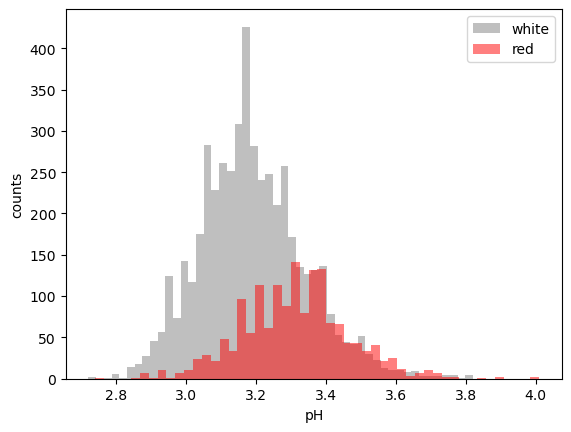

In [34]:
pH_whites = df_whites['pH']
pH_reds = df_red['pH']
plt.hist(pH_whites, bins=50, color='gray', alpha=0.5, label="white")
plt.hist(pH_reds, bins=50, color='red', alpha=0.5, label="red")
plt.xlabel('pH')
plt.ylabel('counts')
plt.legend();

The two distributions look different, but is there a better way at looking them? 

### A boxplot can graphically show the locality, spread and distribution of the data

- A box plot lets you quickly examine multiple distributions graphically
- It is great for comparing distributions
- You don't have to make a choice on number of bins
- You can immediately see the median, 50% region of the data, quantiles, as well as outliers.  
- You can also display the mean and median giving you an idea how skewed the data is and whether assuming that data is normally distributed is a good assumption. 

<img src="images/Boxplot_vs_PDF.png" width="500">

By Jhguch at en.wikipedia, CC BY-SA 2.5, https://commons.wikimedia.org/w/index.php?curid=14524285

Here is an example of how the boxplot in matplotlib will look like:   

#### Let's plot the pH data as a boxplot

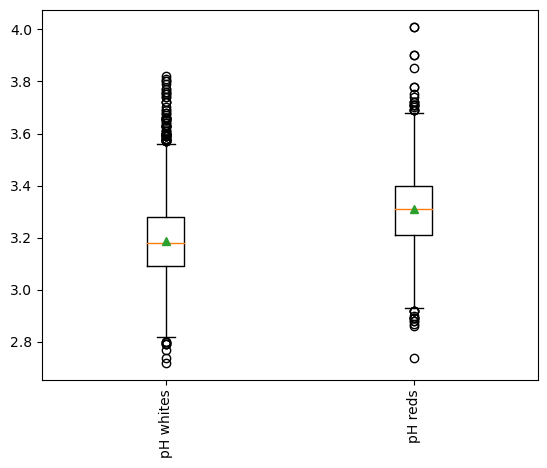

In [35]:
columns = [pH_whites, pH_reds]

fig, ax = plt.subplots()
# in matplotlib you can use the boxplot function and set the show means to True
ax.boxplot(columns, showmeans=True) 
plt.xticks([1, 2], ["pH whites", "pH reds"], rotation=90)
plt.show()
# the orange lines represent the median of the data and the green triangles the mean

From the boxplot we can see that the mean and median are quite similar. We could not see this on the distribution plot before. Now let's look at the actual values for the means, medians and standard deviations?

In [36]:
print(f'The mean pH is {np.mean(pH_whites):.3f}, \
the median pH is {np.median(pH_whites):.3f}, \
and the standard deviation in white wines is {np.std(pH_whites):.3f}.')
print(f'The mean pH is {np.mean(pH_reds):.3f}, \
the median pH is {np.median(pH_reds):.3f}, \
and the standard deviation in red wines is {np.std(pH_reds):.3f}.')

The mean pH is 3.188, the median pH is 3.180, and the standard deviation in white wines is 0.151.
The mean pH is 3.311, the median pH is 3.310, and the standard deviation in red wines is 0.154.


#### These numbers look quite similar. Can we statistically say if they come from a different underlying distribution?

### 4.3 The Student's t-test
<a id='test'></a>

#### When to use a t-test?

A t-test is a parametric test of difference, meaning that the underlying data is as follows:
1. Your samples of the data are independent.
2. They are approximately normally distributed.
3. Have a similar amount of variance. 

You can also only compare means of two groups. If want to compare multiple means not in a pairwise fashion there are [other tests](https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/anova/wil). In the same spirit, if the above assumptions do not fit, you can use a nonparametric test such as the [Wilcoxon Signed Rank](https://www.statstest.com/wilcoxon-signed-rank-test/) test. A lot of these tests are implemented in Python. 

#### Performing a t-test
In a t-test you are estimating the **true** difference between two dataset means. This is done by using the ratio of the difference in dataset means over the pooled standard error of the two datasets. Mathematically you can write the student t-test as:

$$t = \frac{\mu_1-\mu_2}{s_p\sqrt{\frac{2}{N}}} $$

As before $\mu_1$ and $\mu_2$ represent the means of the respective two datasets, $N_1$=$N_2$=$N$ and are the number of samples and $s_p$ is the pooled standard deviation of the datasets. There is a more general form with the two dataset having different sample sizes too!

#### Pooled standard deviations of a dataset
The pooled standard deviation is a method for estimating a single standard deviation to represent all independent samples or groups in your study when they are assumed to come from populations with a common standard deviation. The pooled standard deviation is the average spread of all data points about their group mean (not the overall mean). It is a weighted average of each group's standard deviation.

Mathematically you can write the pooled standard deviation as:

$S_p = \sqrt{\frac{\sigma_1^2+\sigma_2^2}{2}}$


#### What does the calculated t-value mean?

A large t-value means that the difference between the means of the two datasets is greater than the pooled standard error, which means there is likely a significant difference between the two datasets. 

Typically you would compare your t-value to tabulated t-values to decided if you accept the null hypothesis. Have a look here for more details: https://www.statology.org/here-is-how-to-find-the-p-value-from-the-t-distribution-table/

#### The Null hypothesis and tabulated data
The hypothesis you are testing against, is that the difference in means between two datasets is 0. 
When you perform a t-test with Python, you will get a p-value returned, giving you the probability of how likely is it to see this result by chance. The p-value is a proportion: if your p-value is 0.05, that means that 5% of the time you would see a test statistic at least as extreme as the one you found if the null hypothesis was true.

Let's have a look at using the t-test for our wine dataset:

#### Performing a two sample t-test

Previously we have seen that our data is approximately normally distributed. We also want to make sure that our ratio of variances of the two datasets is less than 4:1. So we start with that.

In [37]:
ratio = np.var(pH_reds)/np.var(pH_whites)
print(ratio)
## Looks like we are good to go with our t-test

1.0449080866390097


In [38]:
# We are using scipy stats library to peform the t-test
import scipy.stats as stats

t_test_out = stats.ttest_ind(a=pH_reds, b= pH_whites, equal_var = True)
print(t_test_out)

ModuleNotFoundError: No module named 'scipy'

#### Hypothesis reminder:
H0 => $\mu_1$ = $\mu_2$ (population mean of dataset1 is equal to dataset2)

HA => $\mu_1 \ne \mu_2$ (population mean of dataset1 is different from dataset2)

The p-value is smaller than alpha=0.05 means we **can reject the null hypothesis (H0)**. There is sufficient evidence that the mean pH of white wine is different to the mean pH of red wine in the dataset. 

## Tasks
<a id='tasks3'></a>

<div class="alert alert-success">
<b>Task 4.3.1: Compare the density of red and white wines</b>

Compute the following:

- Histogram of the density
- Boxplot of the density
- After you are sure you can carry out a t-test, carry it out. 
- What happens if you only take every 200th data point? What does the null hypothesis of the t-test say?
    
 </div>

In [ ]:
# Task 1: Test out the solution in this cell:


<details><summary {style='color:green;font-weight:bold'}> Click here to see solution to Task. </summary>
    
```Python
# Histograms 
density_whites = df_whites['density']
density_reds = df_red['density']
plt.hist(density_whites, bins=50, alpha=0.5)
plt.hist(density_reds, bins=50, color='green', alpha=0.5)
plt.xlabel('density')
plt.ylabel('counts')
    
# Box plots
columns = [density_whites, density_reds]

fig, ax = plt.subplots()
ax.boxplot(columns, showmeans=True) # in matplotlib you can use the boxplot function and set the show means to True
plt.xticks([1, 2], ["density whites", "density reds"], rotation=90)
plt.show()
    
# t-testing
print(np.var(density_reds)/np.var(density_whites))
print("yes we can do a t-test")
t_test = stats.ttest_ind(a=density_reds, b= density_whites, equal_var = True)
print(t_test)
t_test_sub_sample = stats.ttest_ind(a=density_reds[::200], b= density_whites[::200], equal_var = True)
print(t_test_sub_sample)
print("The two density distributions have two different means for the original dataset. When you subsample heavily the null hypothesis does not hold true anymore.")

```
</details>

<div class="alert alert-success">
<b>Task 4.3.2: Compare the residual sugar of red and white wines</b>

Compute the following:

- Histogram of the residual sugar
- Boxplot of the residual sugar
- Is the data suitable for a t-test? If so, carry out a t-test. 
    
</div>

In [ ]:
# Task 2: Test out the solution in this cell:




<details><summary {style='color:green;font-weight:bold'}> Click here to see solution to Task. </summary>
    
```Python
# Histograms 
sugar_whites = df_whites['residual sugar']
sugar_reds = df_red['residual sugar']
plt.hist(sugar_whites, bins=50, alpha=0.5)
plt.hist(sugar_reds, bins=50, color='green', alpha=0.5)
plt.xlabel('residual sugar')
plt.ylabel('counts')

# Box plots
columns = [sugar_whites, sugar_reds]

fig, ax = plt.subplots()
ax.boxplot(columns, showmeans=True) # in matplotlib you can use the boxplot function and set the show means to True
plt.xticks([1, 2], ["residual sugar whites", "residual sugar reds"], rotation=90)
plt.show()

# t-testing
print(np.var(sugar_reds)/np.var(sugar_whites))
print("No we cannot do a t-test")

```
</details>

<div class="alert alert-warning">
<b>Advanced Task 4.3.3: Write a function that computes the t-value based on the formula given above</b>
</div>


In [ ]:
# Task 3: Test out the solution in this cell:




# Break
<img src="images/break.png" alt="drawing" width="200">

## Next Notebook:
[Unit_06_molecular_geometries_II.ipynb](Unit_06_molecular_geometries_II.ipynb)